In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

In [11]:
## Orbit plot functions for EDA 
from orbit.eda import eda_plot

## Orbit Themed Palette and styles 
import orbit.constants.palette as palette
from orbit.utils.plot import get_orbit_style

# Orbit models and diagnostic plots 
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components

# Orbit Backtest tools 
from orbit.diagnostics.backtest import BackTester, TimeSeriesSplitter
from orbit.diagnostics.plot import plot_bt_predictions
from orbit.diagnostics.metrics import smape, wmape
# Orbit plotting backtest with gif
from orbit.diagnostics.plot import plot_bt_predictions2


# use orbit plotting style for my entire notebook 
orbit_style = get_orbit_style()
plt.style.use(orbit_style)

In [34]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
scaler = StandardScaler()
df['y2'] = scaler.fit_transform(df[['y']])
df.tail()

,ds,y,y2
103,1968-08-01,16722,0.472200
104,1968-09-01,14385,-0.046648
105,1968-10-01,21342,1.497906
106,1968-11-01,17180,0.573882
107,1968-12-01,14577,-0.004021


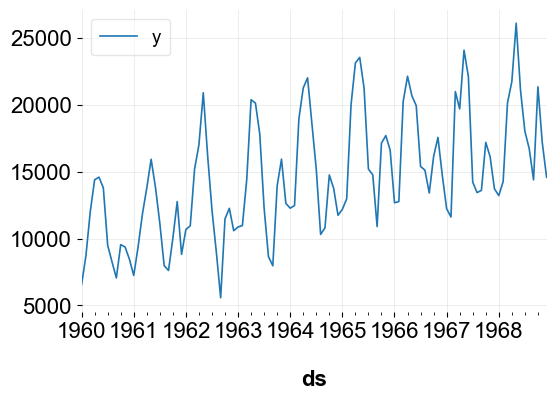

In [35]:
df.plot(x='ds', y='y')
plt.show()

In [37]:
test_size = 12

train_df = df[:-test_size]
test_df = df[-test_size:]

In [38]:
dlt_model = DLT(response_col = 'y2', 
                date_col = 'ds', 
                seasonality = 12, 
                seed = 777,
                )

In [39]:
dlt_model.fit(train_df)


2023-03-21 14:26:54 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

In [40]:
predicted_df = dlt_model.predict(test_df)

In [41]:
predicted_df

,ds,prediction_5,prediction,prediction_95
0,1968-01-01,-0.910599,-0.482383,0.062689
1,1968-02-01,-1.034171,-0.407802,0.150330
2,1968-03-01,0.888070,1.503849,2.080568
3,1968-04-01,1.007655,1.594182,2.161168
4,1968-05-01,1.553077,2.115575,2.587194
5,1968-06-01,1.175701,1.680248,2.406726
6,1968-07-01,-0.532283,0.217718,0.897026
7,1968-08-01,-0.572150,0.106746,0.797528
8,1968-09-01,-0.867485,-0.149017,0.456693
9,1968-10-01,0.053506,0.633678,1.426390


In [42]:
df_pred = df.merge(predicted_df[['ds', 'prediction']], how='left')

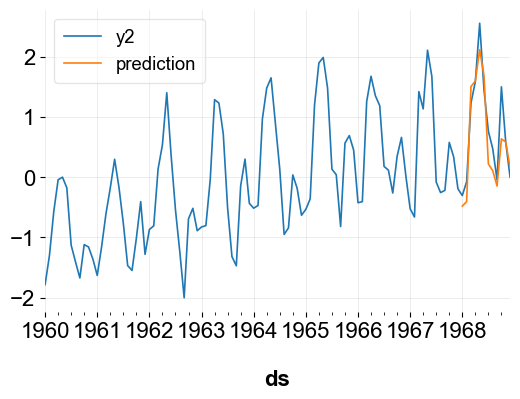

In [43]:
ax = df_pred.plot(x='ds', y='y2')
df_pred.plot(x='ds', y='prediction', ax=ax)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(test_df['y2'], predicted_df['prediction']))
print(math.sqrt(mean_squared_error(test_df['y2'], predicted_df['prediction'])))

0.1396008454666442
0.3736319652634718


In [47]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test_df['y2'], predicted_df['prediction']))

0.2923431467085818
